<a href="https://colab.research.google.com/github/dimakpa/DL_Projects/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Реализуем сверточную нейронную сеть для распознавания рукпописных цифр

Подлкючим библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

Conv2D - изображения
Conv3D - видео
Conv1D - аудио

filters - число ядер (каналов)
kernel_size - размер ядра (в виде кортежа двух чисел)
strides - шаг сканирования фильтров по осям плоскости (по умолчанию один пиксель)

Подготовим тестовые данные

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# стандартизация входных данных
x_train = x_train / 255
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

ПОказываем кокая ось добавляется

In [6]:
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

In [7]:
print( x_train.shape )

(60000, 28, 28, 1)


Запишем нашу модель, которая содержит несколько слоев

Класс - Conv2D
32 - число фильра
(3,3) - размер фильтров
padding = 'same' - добавление граничных пикселей для обработки всего изображения
relu - функция активации
input_shape - изображение (28, 28, 1) 28*28 пикселей с одним входным каналом (в градациях серого)

класс - MaxPooling
pool_size = (2, 2) - размер окна
strides - шаг сканирования
padding = 'valid' - не добавляет никаких нулевых пискелей к рамке значений

класс Flatten() - слой, который вытягивает весь тензор в один вектор

Dense - принимает выходные данные со слоя Flatten и имеет 128 нейронов и подает на выходной слой с 10 нейронами (0, 1, ... 8, 9)

После второго слоя размер изображений уменьшился и стал 14*14
После четвертого слоя размер изображения стал 7*7 и имеет 64 канала 7х7х64
Весь этот тензор нужно подать на сверточную сеть

In [3]:
model = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')
])

вывод структуры НС в консоль

In [4]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

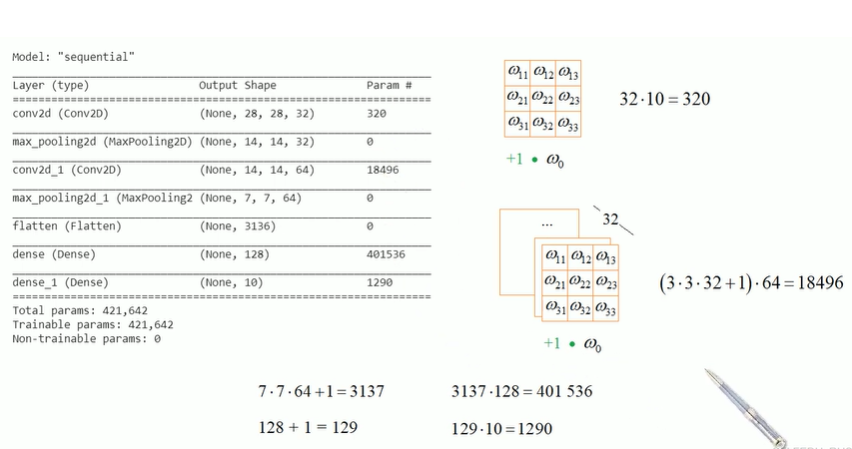

Компилируем нашу модель с оптимизатором Адам
Потери буем определять с помощью категориальной энтропии
Метрика accuracy

In [8]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


Обучаем

In [9]:
his = model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 79s 52ms/step - loss: 0.1330 - accuracy: 0.9599 - val_loss: 0.0564 - val_accuracy: 0.9822
Epoch 2/5
1500/1500 [==============================] - 77s 51ms/step - loss: 0.0450 - accuracy: 0.9861 - val_loss: 0.0409 - val_accuracy: 0.9881
Epoch 3/5
1500/1500 [==============================] - 82s 54ms/step - loss: 0.0303 - accuracy: 0.9905 - val_loss: 0.0380 - val_accuracy: 0.9882
Epoch 4/5
1500/1500 [==============================] - 76s 50ms/step - loss: 0.0205 - accuracy: 0.9935 - val_loss: 0.0442 - val_accuracy: 0.9885
Epoch 5/5
1500/1500 [==============================] - 75s 50ms/step - loss: 0.0158 - accuracy: 0.9948 - val_loss: 0.0366 - val_accuracy: 0.9905


Тестируем

In [10]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 5s 17ms/step - loss: 0.0341 - accuracy: 0.9887


[0.03412289172410965, 0.9886999726295471]